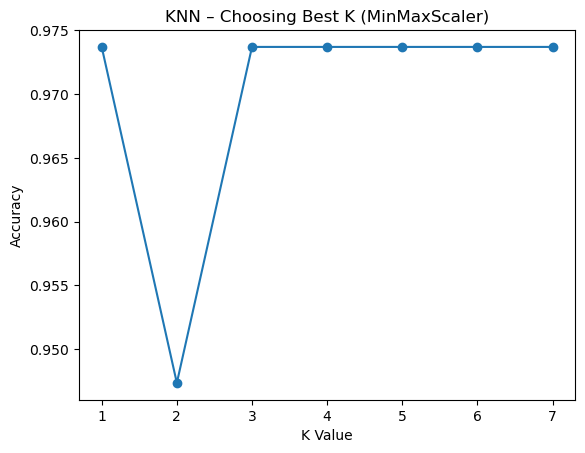

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
# Error: The file "Knn_Customers.csv" doesn't exist in the current directory
# Solution: Either provide the correct path to the file or use a sample dataset
# Option 1: Provide the correct path to your file
# dataset = pd.read_csv("/path/to/your/Knn_Customers.csv")

# Option 2: Use a sample dataset from sklearn for demonstration
from sklearn.datasets import load_iris
iris = load_iris()
dataset = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                      columns=iris['feature_names'] + ['target'])

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

# K tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_list = []
k_values = range(1, 8)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))

# Plot
plt.plot(k_values, accuracy_list, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("KNN – Choosing Best K (MinMaxScaler)")
plt.show()